Exercise-05\
190639B


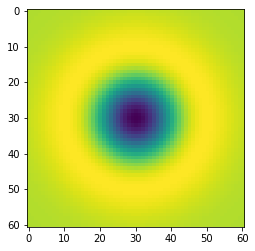

In [4]:
# Q1

import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw+1, 1), np.arange(-hw, hw+1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)
plt.show()

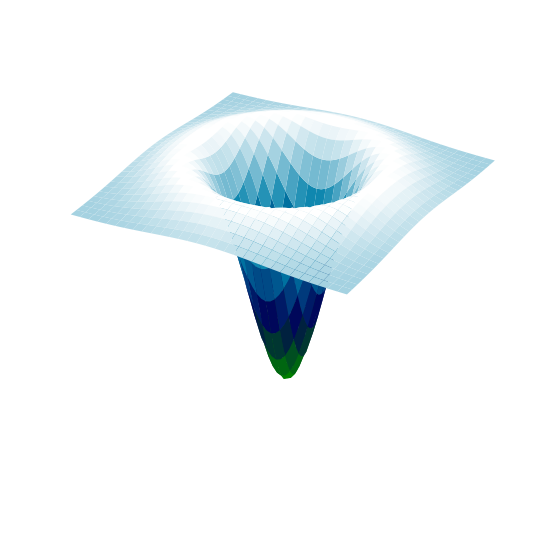

In [5]:
# Q 1 (3D)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')

surf = ax.plot_surface(X,Y,log,cmap=cm.ocean,linewidth=0,antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

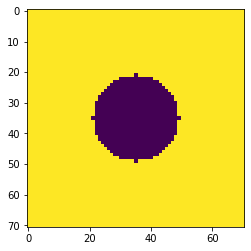

In [6]:
# Q2

# Generating the circle
import numpy as np
import cv2  as cv
import matplotlib.pyplot as plt

w, h = 71, 71
hw, hh = w//2 ,  h//2

f = np.ones((h,w),dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh+1, 1), np.arange(-hw, hw+1,1))
r = w//5 #14
f *= X**2 + Y**2 > r**2
plt.imshow(f)
plt.show()

(35, 35, 5)
10


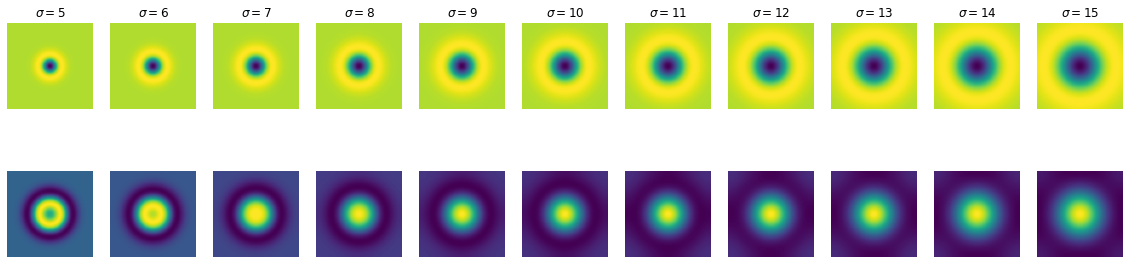

In [7]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space =np.empty((h, w, s),dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(np.arange(5,16,1)):
    log_hw = 3*np.max(sigma)
    X, Y = np.meshgrid(np.arange(-hw, hw+1, 1), np.arange(-hw, hw+1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma ={}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) #r = \sqrt{2}*sigma
print(sigmas[indices[2]])
plt.show()

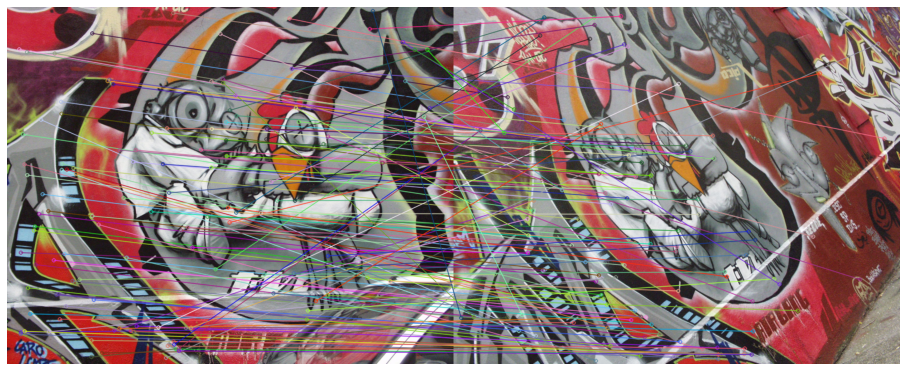

In [8]:
# Q 3

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('img1.ppm',cv.IMREAD_COLOR)
img2 = cv.imread('img4.ppm',cv.IMREAD_COLOR)

sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(16,10))
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

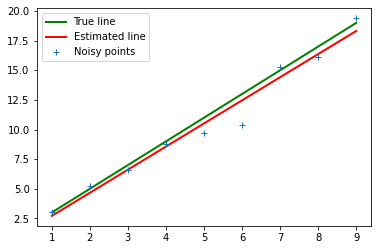

In [9]:
# Q 4

# Least-squares line following
import numpy as np
import matplotlib.pyplot as plt

# Generating the true line y = m*x +c
m = 2 # gradient
c = 1 # intercept
x = np.arange(1 ,10 , 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np . zeros (x.shape)
#o[=1] = 20
y = m*x + c + noise + o

n= len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c ], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1]+cstar ], color='r', linewidth=2, label=r'Estimated line')
plt.plot(x, y, '+', label = 'Noisy points')
plt.legend()
plt.show()

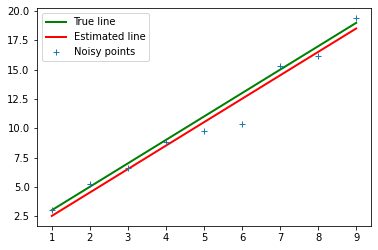

In [10]:
# Q 5

# Total least squares line fitting
import numpy as np
import matplotlib.pyplot as plt

# Generating the true line y = m*x +c
m = 2 # gradient
c = 1 # intercept
x = np.arange(1 ,10 , 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np . zeros (x.shape)
#o[=1] = 20
y = m*x + c + noise + o

n = len(x)

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11, u12], [u21, u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:, np.argmin(W)]

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c ], color='g', linewidth=2, label=r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1]+cstar ], color='r', linewidth=2, label=r'Estimated line')
plt.plot(x, y, '+', label = 'Noisy points')
plt.legend(loc='best')
plt.show()

